## 实验证明，一个两层的ReLU网络可以模拟任何有界闭集函数

Epoch 0: Loss = 0.4993763132325942
Epoch 100: Loss = 0.4876308894873878
Epoch 200: Loss = 0.47025483765714365
Epoch 300: Loss = 0.44764652842388925
Epoch 400: Loss = 0.42968457836439256
Epoch 500: Loss = 0.4203330601744116
Epoch 600: Loss = 0.41486453083197855
Epoch 700: Loss = 0.4100851596750313
Epoch 800: Loss = 0.40517355021903895
Epoch 900: Loss = 0.4000091265000391
Epoch 1000: Loss = 0.3946258953226
Epoch 1100: Loss = 0.38911134337583303
Epoch 1200: Loss = 0.38358504906005414
Epoch 1300: Loss = 0.3781757370332572
Epoch 1400: Loss = 0.3730042124148631
Epoch 1500: Loss = 0.368160583020186
Epoch 1600: Loss = 0.36370583387018196
Epoch 1700: Loss = 0.35966796347367513
Epoch 1800: Loss = 0.3560527451899521
Epoch 1900: Loss = 0.3528460728962466
Epoch 2000: Loss = 0.3500226199647474
Epoch 2100: Loss = 0.3475472385482767
Epoch 2200: Loss = 0.34538796068106536
Epoch 2300: Loss = 0.34351092970370456
Epoch 2400: Loss = 0.34188587285592315
Epoch 2500: Loss = 0.3404746559899086
Epoch 2600: Loss

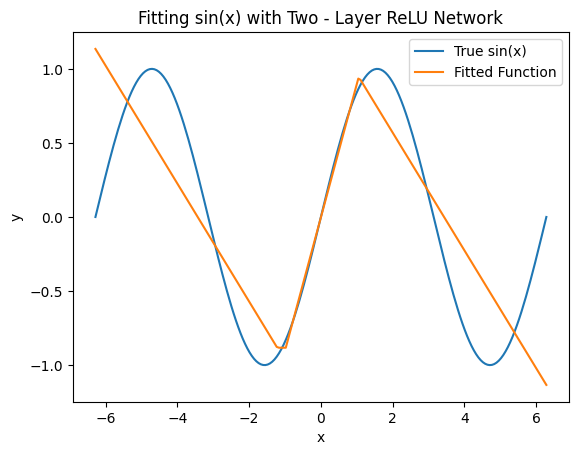

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 激活函数采用Relu
def relu(x):
    return np.maximum(0, x)

# 定义两层ReLU神经网络
class mymodel:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.z2

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            error = y - output
            dw2 = np.dot(self.a1.T, error) / X.shape[0]
            db2 = np.sum(error, axis=0, keepdims=True) / X.shape[0]
            dZ1 = np.dot(error, self.w2.T) * (self.z1 > 0).astype(float)
            dw1 = np.dot(X.T, dZ1) / X.shape[0]
            db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]
            self.w1 += learning_rate * dw1
            self.b1 += learning_rate * db1
            self.w2 += learning_rate * dw2
            self.b2 += learning_rate * db2

            if epoch % 100 == 0:
                loss = np.mean((y - output) ** 2)
                print(f'Epoch {epoch}: Loss = {loss}')


# 生成训练数据
x_train = np.linspace(-2 * np.pi, 2 * np.pi, 500).reshape(-1, 1)
y_train = np.sin(x_train)
# 初始化神经网络
input_size = 1
hidden_size = 100
output_size = 1
network = mymodel(input_size, hidden_size, output_size)
# 训练神经网络
epochs = 40000
learning_rate = 0.01
network.train(x_train, y_train, epochs, learning_rate)
# 生成测试数据
x_test = np.linspace(-2 * np.pi, 2 * np.pi, 200).reshape(-1, 1)
y_test = np.sin(x_test)
y_pred = network.forward(x_test)

# 可视化结果
plt.plot(x_test, y_test, label='True sin(x)')
plt.plot(x_test, y_pred, label='Fitted Function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting sin(x) with Two - Layer ReLU Network')
plt.show()
